In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split


In [14]:
import os

# Path to the dataset folder
data_dir = '/kaggle/input/food11-image-dataset'  # Modify the path if needed

# List the content of the folder
print(os.listdir(data_dir))


['validation', 'training', 'evaluation']


In [15]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Paths to the subfolders
train_dir = os.path.join(data_dir, 'training')
validation_dir = os.path.join(data_dir, 'validation')

# Image size configuration
img_size = (224, 224)
batch_size = 32

# Load the training dataset
train_dataset = image_dataset_from_directory(train_dir,
                                             image_size=img_size,
                                             batch_size=batch_size)

# Load the validation dataset
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  image_size=img_size,
                                                  batch_size=batch_size)

print("Datasets loaded successfully.")


Found 9866 files belonging to 11 classes.
Found 3430 files belonging to 11 classes.
Datasets chargés avec succès.


In [16]:
class_names = train_dataset.class_names
print("Classes:", class_names)
print("Nombre d'images dans l'ensemble d'entraînement:", len(train_dataset))
print("Nombre d'images dans l'ensemble de validation:", len(validation_dataset))


Classes: ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']
Nombre d'images dans l'ensemble d'entraînement: 309
Nombre d'images dans l'ensemble de validation: 108


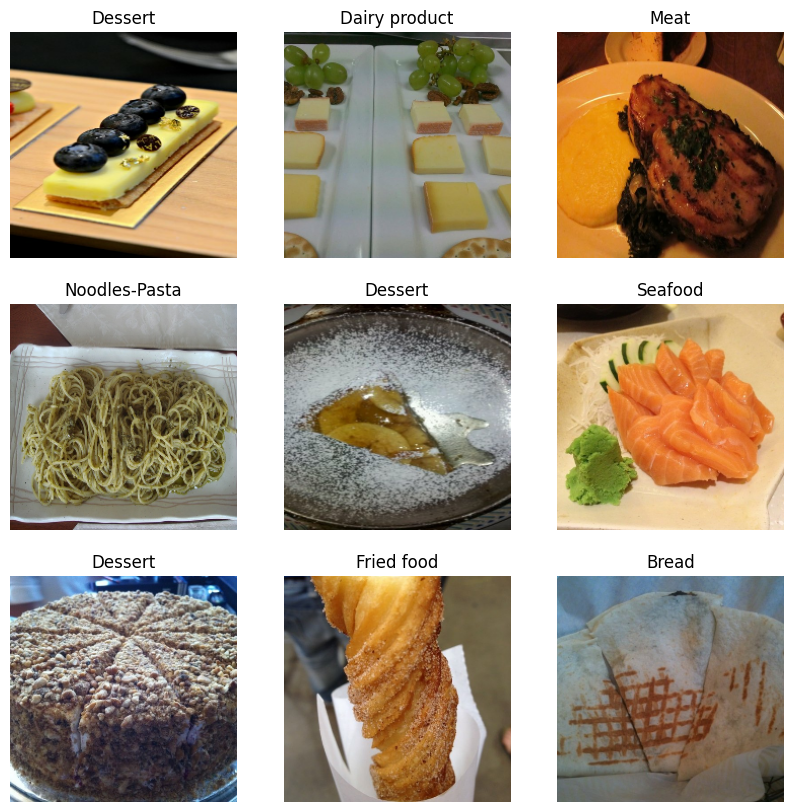

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [23]:
from collections import Counter

# Count the occurrences of classes in the training dataset
labels = []
for _, label in train_dataset:
    labels.extend(label.numpy())
class_counts = Counter(labels)

# Display the number of images per class
for class_name, count in zip(class_names, [class_counts[i] for i in range(len(class_names))]):
    print(f"{class_name}: {count} images")


Bread: 994 images
Dairy product: 429 images
Dessert: 1500 images
Egg: 986 images
Fried food: 848 images
Meat: 1325 images
Noodles-Pasta: 440 images
Rice: 280 images
Seafood: 855 images
Soup: 1500 images
Vegetable-Fruit: 709 images


In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Create the model

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(11, activation='softmax')  # 11 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
class_weight = {
    0: 1.0,   # Bread
    1: 2.3,   # Dairy product
    2: 0.67,  # Dessert
    3: 1.0,   # Egg
    4: 1.2,   # Fried food
    5: 0.76,  # Meat
    6: 2.25,  # Noodles-Pasta
    7: 4.0,   # Rice
    8: 1.1,   # Seafood
    9: 0.67,  # Soup
    10: 1.4   # Vegetable-Fruit
}


In [29]:
history = model.fit(train_dataset, 
                    validation_data=validation_dataset, 
                    epochs=10, 
                    class_weight=class_weight)


Epoch 1/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 608s 2s/step - accuracy: 0.2769 - loss: 2.1982 - val_accuracy: 0.3227 - val_loss: 1.9172
Epoch 2/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 573s 2s/step - accuracy: 0.3779 - loss: 1.8962 - val_accuracy: 0.3309 - val_loss: 1.9265
Epoch 3/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 577s 2s/step - accuracy: 0.5185 - loss: 1.4764 - val_accuracy: 0.3720 - val_loss: 2.0194
Epoch 4/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 573s 2s/step - accuracy: 0.6757 - loss: 0.9246 - val_accuracy: 0.3837 - val_loss: 2.5616
Epoch 5/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 623s 2s/step - accuracy: 0.8195 - loss: 0.5010 - val_accuracy: 0.3840 - val_loss: 3.3129
Epoch 6/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 571s 2s/step - accuracy: 0.8862 - loss: 0.3229 - val_accuracy: 0.3778 - val_loss: 3.9159
Epoch 7/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 626s 2s/step - accuracy: 0.9385 - loss: 0.1766 - val_accuracy: 0.3464 - val_loss: 4.2902
Epoch 8/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 575s 2s/step - accuracy: 0.9410 - loss: 0.1770 - val_accu

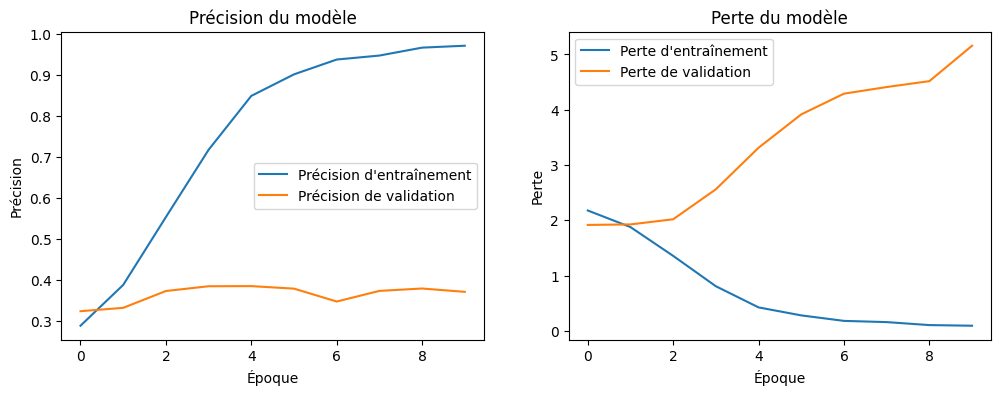

In [30]:
# Plot accuracy
plt.figure(figsize=(12, 4))

# Training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
